In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Check pandas version to make sure 0.25.1 and the worksheet is working
pd.__version__

'0.25.1'

In [3]:
%matplotlib inline

**How to use this worksheet**

**1.Point Misty at something interesting**

    There needs to be different levels of depth or something interesting in the frame. 


**2.Get Depth Data**

    The data is pulled in using either Misty API Explorer or Postman. 
    GET http://<your Misty robots IP address>/api/cameras/depth

    The data should be in json format: 
    {
        "result": {
            "height": 240,
            "image": [ "NaN", ...],
            "width": 320
        },
        "status": "Success"
    }     
      
**3. Save the data** as a <yourfilename>.json file
    
**4. Read in the data** by changing the script below to reference your file 

**5. Run each of the cells** in order

**6. If Desired:** Take a fisheye picture and compare


In [4]:
# Read in a json file

#depth = pd.read_json('../coderepo/<your file name here>.json')
data = pd.read_json('../coderepo/BB8_HW.json')

#Transpose the DataFrame to get the column labels to contain height width, and image
dataT = data.T

print(" The height and width should be (240, 320):", dataT['height'].result, dataT['width'].result);
dataT

 The height and width should be (240, 320): 240 320


,height,image,width
result,240,"[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, ...",320
status,Success,Success,Success


In [5]:
#Next Extract the Image Data - all 76800 values
sf = dataT['image'].result;

#Turn the result into a DataFrame
depth = pd.DataFrame(sf);

#Rename the volumn values
depth.rename(columns={0:'Values'}, inplace=True);


#Check to see the count of NaN values in the Image - Count all NaN's
NaN_cnt = (depth.Values == 'NaN').sum(); 

# Calculate the coverage of the data
coverage = round(((76800-NaN_cnt)/76800)*100,2) #percent of non-NaN "good" values
print("Depth point coverage is: ", coverage, "%");


 # Subject to change - it does work with 40%, but less than that risk divide by zeros
if coverage < 50: 
    print("Data not so good - you may not have valid data in all cells")    
    print("You may have problems running the rest of the cells")  
    

Depth point coverage is:  41.88 %
Data not so good - you may not have valid data in all cells
You may have problems running the rest of the cells


In [6]:
#Look at depth Dataframe before moving on
depth.describe()

,Values
count,76800
unique,4695
top,NaN
freq,44636


In [7]:
#replace all of the NaN values with 0
fo = depth.replace('NaN',0)
fo

,Values
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
76795,0.0
76796,0.0
76797,0.0
76798,0.0


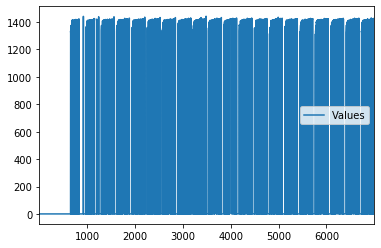

In [8]:
#Plot first 7000 points - can change this to look at other regions
fo_small = fo[1:7000]
fo_small.plot();

pandas.core.frame.DataFrame

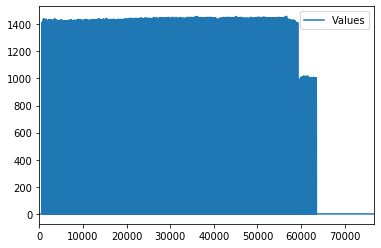

In [9]:
fo.plot()
type(fo)

In [10]:
#Reshape the array
data = np.array(fo).reshape((240,320))
data.shape

(240, 320)

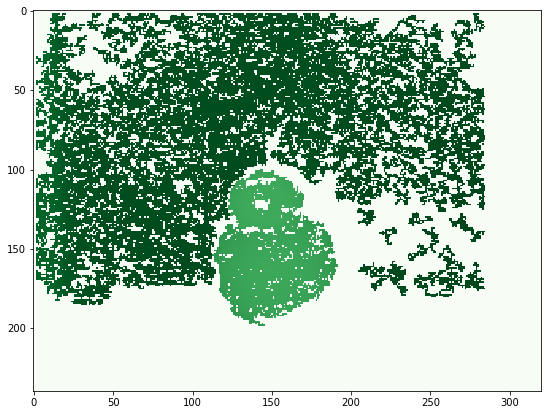

In [11]:
#Plot the data

plt.rcParams['figure.figsize'] = [12, 7]

#plt.imshow(data, cmap=plt.get_cmap('gray'));
plt.imshow(data, cmap=plt.get_cmap('Greens'));

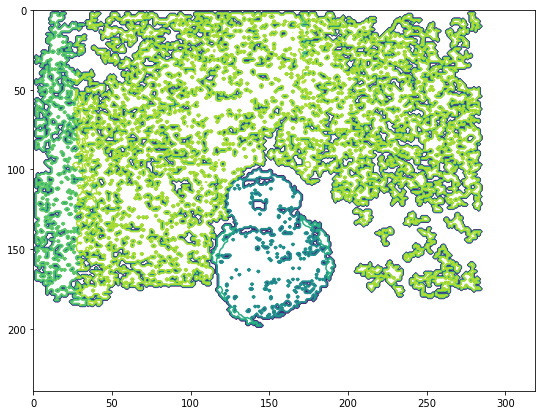

In [12]:
# Try different ways of plotting
plt.rcParams['figure.figsize'] = [9, 7]
plt.contour(data)
plt.gca().invert_yaxis() #need to rotate or flip it so that 0 is at the top 

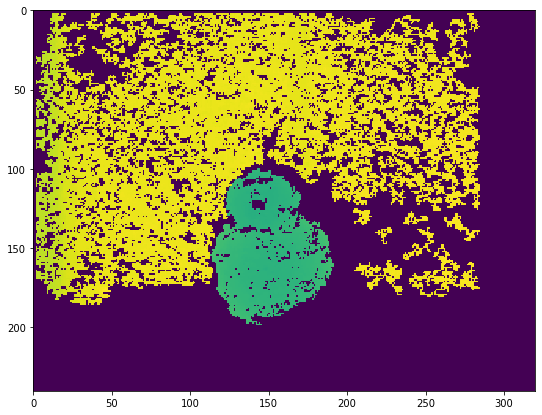

In [13]:
plt.rcParams['figure.figsize'] = [9, 7]
plt.pcolormesh(data)
plt.gca().invert_yaxis()

In [14]:
#Create the column arrays for the sum results to be stored in
#There are 320 columns so create zero arrays of length 320

colDepthSum = np.empty(320)
colDepthCount = np.empty(320)
columnDepth = np.empty(320)

for i in range(320):
    colDepthSum[i]=0
    colDepthCount[i]=0
    columnDepth[i]=0
    

In [15]:
# This takes each of the 320 columns and iterates the number or rows. Each column is averaged into a single depth
# The data input is fo, which has all of the NaN's removed (see above)

depthSum = 0;        #sum total of all depth points
depthCount = 0;      #count of all non-zero points
tempDepth = 0;       #temporary variable for holding value

for i in range(76800): #76800 is the number of array points returned from the depth picture
    if fo.Values[i] != 0:
        tempDepth = fo.Values[i]    #don't really need this step
        depthCount = depthCount +1
        depthSum = depthSum + tempDepth
        
        indes=i%320 #There are 320 colums - find correct column by remainder of position index
        
        colDepthSum[indes] = colDepthSum[indes] + fo.Values[i]
        colDepthCount[indes] = colDepthCount[indes] + 1
        
    
print("number of non-zero values:", depthCount, 'which is', round(depthCount/76800*100,1) ,'% coverage')
print("average overall depth:", round(depthSum/depthCount,4))

number of non-zero values: 32164 which is 41.9 % coverage
average overall depth: 1346.175


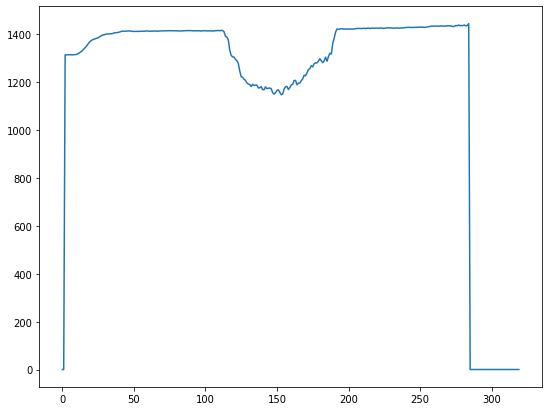

In [43]:
#In here - calculate the average depth for each of the 320 columns

#Imagine looking at what Misty "sees" from top view  - looking down on Misty's head

for i in range(320):
    if colDepthCount[i] !=0:
        columnDepth[i] = colDepthSum[i]/colDepthCount[i]
        
        
plt.plot(columnDepth)
plt.show()

In [17]:
#OK, now onto a depth map with fewer array positions. Try 12, and then plot these.

#use different variables from above. 

#want to have 3 rows of 4 squares. So there are 12 total. Each "block" is 80x80 = 6400 measurements

#looks like this:
# TFL - TNL - TNR - TFR
# MFL - MNL - MNR - MFR
# BFL - BNL - BNR - BFR

TFL = 0 #TopFarLeft - 1
TNL = 0
MFL = 0
MNL = 0
BFL = 0
BNL = 0
TFR = 0  #TopFarRight - 4
TNR = 0
MFR = 0
MNR = 0
BFR = 0 #BottomFarRight - 12
BNR = 0

TFL_cnt = 0 #TopFarLeft - 1
TNL_cnt = 0
MFL_cnt = 0
MNL_cnt = 0
BFL_cnt = 0
BNL_cnt = 0
TFR_cnt = 0  #TopFarRight - 4
TNR_cnt = 0
MFR_cnt = 0
MNR_cnt = 0
BFR_cnt = 0 #BottomFarRight - 12
BNR_cnt = 0

TFL_sum = 0 #TopFarLeft - 1
TNL_sum = 0
MFL_sum = 0
MNL_sum = 0
BFL_sum = 0
BNL_sum = 0
TFR_sum = 0  #TopFarRight - 4
TNR_sum = 0
MFR_sum = 0
MNR_sum = 0
BFR_sum = 0 #BottomFarRight - 12
BNR_sum = 0


depthSum = 0;        #sum total of all depth points
depthCount = 0;      #count of all non-zero points

for i in range(76800): #76800 is the number of array points returned from the depth picture
    if fo.Values[i] != 0:
        depthCount = depthCount + 1
        depthSum = depthSum + fo.Values[i]
        
        indes=i%320 #There are 320 colums - find correct column by remainder of position index
        
        if indes <= 80: #Check column for the Far Left FL variables
            if i <= 25600: #check row - top third of rows are all less than 25600
                #put values in the Top Far Left
                TFL_sum = TFL_sum + fo.Values[i]
                TFL_cnt = TFL_cnt + 1
                
            elif i <= 51200: #put in the Middle Far Left               
                MFL_sum = MFL_sum + fo.Values[i]
                MFL_cnt = MFL_cnt + 1
                
            else: #put in the Bottom Far Left
                BFL_sum = BFL_sum + fo.Values[i]
                BFL_cnt = BFL_cnt + 1        
        
        elif indes <=160: #Check column for the Near Left NL variables
            if i <= 25600: #check row - top third rows are all less than 25600
                #put in the Top Bins
                #print("this")
                TNL_sum = TNL_sum + fo.Values[i]
                TNL_cnt = TNL_cnt + 1
                
            elif i <= 51200: #put in the Middle Bins                  
                MNL_sum = MNL_sum + fo.Values[i]
                MNL_cnt = MNL_cnt + 1
                
            else: #put in the Bottom Bins
                BNL_sum = BNL_sum + fo.Values[i]
                BNL_cnt = BNL_cnt + 1 

        elif indes <=240: #Check column for the Near Right NR variables
            if i <= 25600: #check row - top third rows are all less than 25600
                #put in the Top Bins
                #print("this")
                TNR_sum = TNR_sum + fo.Values[i]
                TNR_cnt = TNR_cnt + 1
                
            elif i <= 51200: #put in the Middle Bins                  
                MNR_sum = MNR_sum + fo.Values[i]
                MNR_cnt = MNR_cnt + 1
                
            else: #put in the Bottom Bins
                BNR_sum = BNR_sum + fo.Values[i]
                BNR_cnt = BNR_cnt + 1    
                
        else: #This is the far right column, everything from column 240 to 320
            if i <= 25600: #check row - top third rows are all less than 25600
                #put in the Top Bins
                #print("this")
                TFR_sum = TFR_sum + fo.Values[i]
                TFR_cnt = TFR_cnt + 1
                
            elif i <= 51200: #put in the Middle Bins                  
                MFR_sum = MFR_sum + fo.Values[i]
                MFR_cnt = MFR_cnt + 1
                
            else: #put in the Bottom Bins
                BFR_sum = BFR_sum + fo.Values[i]
                BFR_cnt = BFR_cnt + 1 
        
      
print("number of valid measurements:", depthCount)
print("average overall depth:", depthSum/depthCount)


coverage = round((depthCount/76800)*100,2); #percent of non-NaN values
print("depth point coverage is: ", coverage, "%")

    

number of valid measurements: 32164
average overall depth: 1346.1749900200505
depth point coverage is:  41.88 %


In [18]:
#Leftmost Column - FarLeft
TFL = round(TFL_sum/TFL_cnt, 2)
MFL = round(MFL_sum/MFL_cnt, 2)
BFL = round(BFL_sum/BFL_cnt, 2)

#Next Column - NearLeft
TNL = round(TNL_sum/TNL_cnt, 2)
MNL = round(MNL_sum/MNL_cnt, 2)
BNL = round(BNL_sum/BNL_cnt, 2)

#Next Column - NearRight
TNR = round(TNR_sum/TNR_cnt, 2)
MNR = round(MNR_sum/MNR_cnt, 2)
BNR = round(BNR_sum/BNR_cnt, 2)

#RightMost Column - FarRight
TFR = round(TFR_sum/TFR_cnt, 2)
MFR = round(MFR_sum/MFR_cnt, 2)
BFR = round(BFR_sum/BFR_cnt, 2)


TakeDepth12pts = [TFL, TNL, TNR, TFL, MFL, MNL, MNR, MFR, BFL, BNL, BNR, BFR]
print("The 12 points array:")
print(TakeDepth12pts)

The 12 points array:
[1389.97, 1412.45, 1417.13, 1389.97, 1391.74, 1234.75, 1294.3, 1439.56, 1390.68, 1054.53, 1105.23, 1437.53]


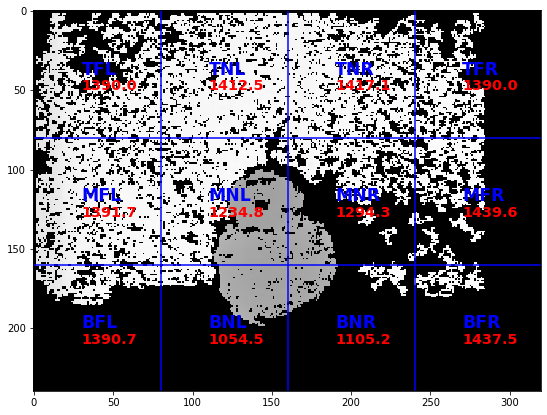

In [21]:
# Re-plot the entire DepthPicture (with points) and inlay lines 
# that show the positions of consolidated points, and the depth 
# level of each of the 12 points

plt.rcParams['figure.figsize'] = [12, 7]
plt.imshow(data, cmap=plt.get_cmap('gray'));
#plt.imshow(data, cmap=plt.get_cmap('Greens'));

#plot horizontal lines
plt.plot([0, 319], [80, 80], 'b');
plt.plot([0, 319], [160, 160], 'b');

#plot vertical lines
plt.plot([80, 80], [0, 239], 'b');
plt.plot([160, 160], [0, 239], 'b');
plt.plot([240, 240], [0, 239], 'b');

plt.annotate('TFL', xy=(30, 40), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('TNL', xy=(110, 40), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('TNR', xy=(190, 40), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('TFR', xy=(270, 40), c='b', fontsize = 'xx-large', fontweight = 'bold');

plt.annotate('%.1f'%(TakeDepth12pts[0]), xy=(30, 50), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[1]), xy=(110, 50), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[2]), xy=(190, 50), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[3]), xy=(270, 50), c='r', fontsize = 'x-large', fontweight = 'bold');

plt.annotate('MFL', xy=(30, 120), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('MNL', xy=(110, 120), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('MNR', xy=(190, 120), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('MFR', xy=(270, 120), c='b', fontsize = 'xx-large', fontweight = 'bold');

plt.annotate('%.1f'%(TakeDepth12pts[4]), xy=(30, 130), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[5]), xy=(110, 130), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[6]), xy=(190, 130), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[7]), xy=(270, 130), c='r', fontsize = 'x-large', fontweight = 'bold');

plt.annotate('BFL', xy=(30, 200), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('BNL', xy=(110, 200), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('BNR', xy=(190, 200), c='b', fontsize = 'xx-large', fontweight = 'bold');
plt.annotate('BFR', xy=(270, 200), c='b', fontsize = 'xx-large', fontweight = 'bold');

plt.annotate('%.1f'%(TakeDepth12pts[8]), xy=(30, 210), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[9]), xy=(110, 210), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[10]), xy=(190, 210), c='r', fontsize = 'x-large', fontweight = 'bold');
plt.annotate('%.1f'%(TakeDepth12pts[11]), xy=(270, 210), c='r', fontsize = 'x-large', fontweight = 'bold');

In [23]:
# The numbers in the plot above are sometimes hard to read
# show the total depth points array - these are the red numbers above
tdp = np.array(TakeDepth12pts).reshape((3,4))
tdp

array([[1389.97, 1412.45, 1417.13, 1389.97],
       [1391.74, 1234.75, 1294.3 , 1439.56],
       [1390.68, 1054.53, 1105.23, 1437.53]])

In [ ]:
#End - The End result is the above 12-point array